In [1]:
pip install seaborn

You should consider upgrading via the '/Users/chaewonheo/mambaforge/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# packages for importing files
import os
import glob

## Creating Summary Dataframe ##

In [3]:
# import intermediate csv
path = 'intermediate_csv/'
df_fat = pd.read_csv(path + 'fat.csv')
df_protein = pd.read_csv(path + 'protein.csv')
df_quantity = pd.read_csv(path + 'quantity.csv')

col_names = df_fat.columns

In [4]:
df_fat.head(3)

,Unnamed: 0,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,...,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products,confirmed,deaths,recovered,active,population
0,0,Afghanistan,0.0,1.39065,4.83625,0.0,1.79580,0.15330,0.0073,0.09490,...,0.0,0.16790,3.81790,0.08030,6.34005,0.132362,0.005628,0.107190,0.000000,38928000.0
1,1,Albania,0.0,2.93460,27.48085,0.0,2.29585,1.41255,0.1241,0.55115,...,0.0,0.78840,7.93875,0.55845,15.45775,2.054827,0.041614,1.185130,0.828083,2838000.0
2,2,Algeria,0.0,0.52195,8.38770,0.0,2.44550,0.70810,0.1168,0.33580,...,0.0,0.50005,15.91765,0.29930,20.70280,0.225211,0.006227,0.151938,0.067047,44357000.0


In [5]:
df_protein.head(3)

,Unnamed: 0,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,...,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products,confirmed,deaths,recovered,active,population
0,0,Afghanistan,0.0000,0.01095,3.85075,0.0,14.20580,0.1606,0.02555,0.22995,...,0.00000,0.05475,0.00000,0.44895,15.89210,0.132362,0.005628,0.107190,0.000000,38928000.0
1,1,Albania,0.1606,0.06205,24.21410,0.0,12.42095,1.5768,0.54750,1.11325,...,0.00365,0.23360,0.00730,2.83240,19.42165,2.054827,0.041614,1.185130,0.828083,2838000.0
2,2,Algeria,0.0219,0.00365,9.38415,0.0,18.01640,0.8760,0.43070,0.78840,...,0.00000,0.18615,0.01825,2.12065,24.53165,0.225211,0.006227,0.151938,0.067047,44357000.0


In [6]:
df_quantity.head(3)

,Unnamed: 0,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,...,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products,confirmed,deaths,recovered,active,population
0,0,Afghanistan,0.01,1.41,67.42,0.0,177.30,1.50,0.25,38.23,...,9.64,0.55,3.82,48.34,289.89,0.132362,0.005628,0.107190,0.000000,38928000.0
1,1,Albania,42.15,3.42,473.16,0.0,145.76,14.66,5.36,171.08,...,38.74,3.82,8.22,296.86,787.33,2.054827,0.041614,1.185130,0.828083,2838000.0
2,2,Algeria,4.33,0.45,153.89,0.0,218.56,8.43,3.86,101.92,...,29.30,1.84,16.47,186.08,644.82,0.225211,0.006227,0.151938,0.067047,44357000.0


In [7]:
col_names

Index(['Unnamed: 0', 'country', 'alcoholic_beverages', 'animal_fats',
       'animal_products', 'aquatic_products_other', 'cereals_excluding_beer',
       'eggs', 'fish_seafood', 'fruits_excluding_wine', 'meat',
       'milk_excluding_butter', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants', 'sugar_crops',
       'sugar_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products', 'confirmed', 'deaths', 'recovered', 'active',
       'population'],
      dtype='object')

In [8]:
country_names = list(df_fat['country'])
covid_names = ['confirmed', 'deaths', 'recovered', 'active',
       'population']
macronutrient_source_names = ['alcoholic_beverages', 'animal_fats',
       'animal_products', 'aquatic_products_other', 'cereals_excluding_beer',
       'eggs', 'fish_seafood', 'fruits_excluding_wine', 'meat',
       'milk_excluding_butter', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants', 'sugar_crops',
       'sugar_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products']

In [9]:
# yearly fat intake of first three countries (alphabetical) (unit: kg/capita/yr)
fat_sum = df_fat[macronutrient_source_names].sum(axis=1)
fat_sum.head(3)

0    22.34895
1    85.87720
2    58.17735
dtype: float64

In [10]:
# yearly protein intake of first three countries (alphabetical) (unit: kg/capita/yr)
protein_sum = df_protein[macronutrient_source_names].sum(axis=1)
protein_sum.head(3)

0    39.48570
1    87.26785
2    67.82430
dtype: float64

In [11]:
# create macronutrients summary dataframe
df_macro = pd.DataFrame({'country': country_names,
                          'fat_sum': fat_sum,
                          'protein_sum': protein_sum})

In [12]:
df_macro.head(3)

,country,fat_sum,protein_sum
0,Afghanistan,22.34895,39.48570
1,Albania,85.87720,87.26785
2,Algeria,58.17735,67.82430


In [13]:
fat_max, protein_max = max(df_macro['fat_sum']), max(df_macro['protein_sum'])
print('Maximum Fat Value: ' + str(fat_max), '\nMaximum Protein Value: ' + str(protein_max))

Maximum Fat Value: 122.05965 
Maximum Protein Value: 102.93365


In [14]:
# TODO: create carbs dataframe
    # -> when trying to create carbs dataframe from 1 - fat - protein, the values become negative for some reason??
    # -> calculating the max fat & protein values, some are over 100%?? maybe i'm interpreting wrong can someone check
# TODO: combine carbs dataframe with summary dataframe

In [15]:
df_covid = df_fat[['country'] + covid_names]
df_covid.head(3)

,country,confirmed,deaths,recovered,active,population
0,Afghanistan,0.132362,0.005628,0.107190,0.000000,38928000.0
1,Albania,2.054827,0.041614,1.185130,0.828083,2838000.0
2,Algeria,0.225211,0.006227,0.151938,0.067047,44357000.0


## Histogram of Worldwide Macronutrient Distribution ##
* `x` : percentage ranges
* `y` : count of countries that fall under the percentage range

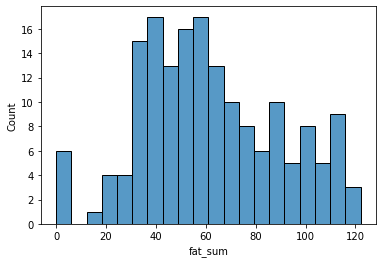

In [16]:
# fat intake distribution worldwide
fig1 = sns.histplot(x='fat_sum', data=df_macro, stat='count', bins=20)

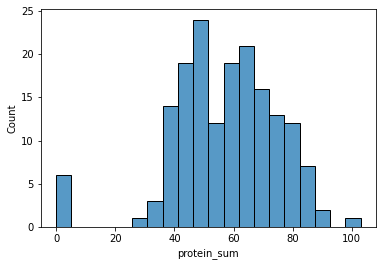

In [17]:
# protein intake distribution worldwide
fig2 = sns.histplot(x='protein_sum', data=df_macro, stat='count', bins=20)

In [18]:
# TODO: check if the histrograms look correct. right now 
# TODO: create carbs intake distribution worldwide

## Histogram of Worldwide Covid Distribution ##
* `x` : percentage of each case
* `y` : count of countries that fall under each bin

In [19]:
print('Total number of countries in the dataset: ', len(df_covid['country']))

Total number of countries in the dataset:  170


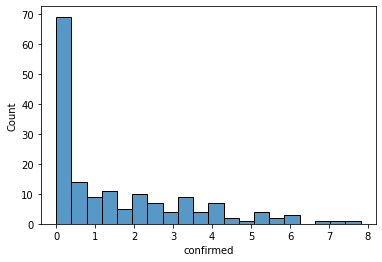

In [20]:
# covid confirmed cases distribution worldwide
fig3 = sns.histplot(x='confirmed', data=df_covid, stat='count', bins=20)

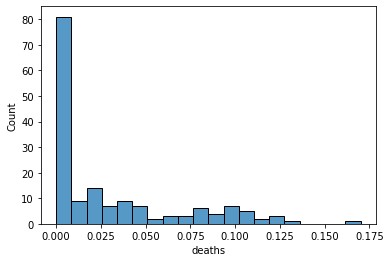

In [21]:
# covid deaths cases distribution worldwide
fig4 = sns.histplot(x='deaths', data=df_covid, stat='count', bins=20)

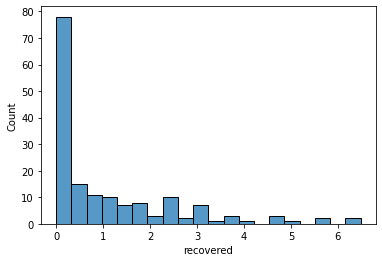

In [22]:
# covid recovered cases distribution worldwide
fig3 = sns.histplot(x='recovered', data=df_covid, stat='count', bins=20)

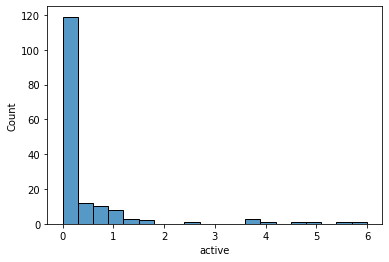

In [23]:
# covid active cases distribution worldwide
fig3 = sns.histplot(x='active', data=df_covid, stat='count', bins=20)

In [24]:
# TODO: regression + other analysis?